## Clustering

In order to extract useful insights about different types of potential groups of blocks in Yucatan with similar characteristics we performed a clustering analysis. We used three different types of clustering algorithms, namely, K Means, Gaussian Mixture Models, and DBSCAN. Our goal is to identify similarities and try to assess the living conditions particularly in blocks with high density of disabled people, compared to those with low density of disabled people.

First, we import some useful libraries.

In [1]:
import matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Then, we load our previously cleaned dataset

In [2]:
input_file = './drive/Shareddrives/CS5056.500 Data Analytics/datos INEGI/datos_clean.csv'
df = pd.read_csv(input_file)
df = df[df['POBTOT'] > 0]
df

,index,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,PNACENT,PHOG_IND,PCON_DISC,PSIND_LIM,P18YM_PB,GRAPROES,PEA,PE_INAC,PSINDER,PDER_SS,P12YM_SOLT,P12YM_CASA,PCATOLICA,POTRAS_REL,TOTHOG,POBHOG,VIVTOT,TVIVHAB,OCUPVIVPAR,VPH_2YMASD,VPH_3YMASC,VPH_C_ELEC,VPH_AGUADV,VPH_AEASP,VPH_TINACO,VPH_EXCSA,VPH_LETR,VPH_C_SERV,VPH_REFRI,VPH_TV,VPH_CEL
0,4,1,Abalá,7,Uayalceh,18,1,62.0,62.000000,59.000000,4.000000,51.000000,4.000000,5.720000,31.000000,16.000000,12.000000,50.000000,10.0000,32.000000,34.000000,0.000000,21.000000,62.000000,23.0,21.0,62.000000,6.000000,14.667958,21.000000,21.000000,21.000000,8.000000,11.000000,0.000000,10.000000,17.00000,21.000000,15.0000
1,5,1,Abalá,7,Uayalceh,18,2,59.0,59.000000,59.000000,0.000000,46.000000,24.407191,3.930000,30.000000,18.000000,21.000000,38.000000,17.0000,28.000000,23.000000,0.000000,19.000000,59.000000,21.0,19.0,59.000000,11.000000,9.000000,19.000000,19.000000,19.000000,6.000000,8.000000,0.000000,7.000000,9.00000,16.000000,9.0000
2,6,1,Abalá,7,Uayalceh,18,3,71.0,71.000000,71.000000,0.000000,57.000000,24.407191,5.940000,34.000000,20.000000,27.000000,44.000000,17.0000,34.000000,54.000000,0.000000,18.000000,71.000000,23.0,18.0,71.000000,10.000000,9.000000,18.000000,18.000000,18.000000,11.000000,13.000000,0.000000,12.000000,12.00000,17.000000,15.0000
3,7,1,Abalá,7,Uayalceh,18,6,13.0,13.000000,13.000000,4.740691,9.000000,0.000000,5.000000,8.000000,3.000000,16.155265,11.000000,18.6207,6.000000,0.000000,0.000000,5.000000,13.000000,6.0,5.0,13.000000,12.771432,4.000000,5.000000,5.000000,5.000000,16.062434,3.000000,0.000000,3.000000,3.00000,5.000000,3.0000
4,8,1,Abalá,7,Uayalceh,18,7,86.0,86.000000,86.000000,4.740691,74.000000,5.000000,6.020000,37.000000,29.000000,13.000000,73.000000,15.0000,42.000000,15.000000,0.000000,18.000000,86.000000,19.0,18.0,86.000000,10.000000,11.000000,18.000000,16.000000,16.000000,4.000000,7.000000,0.000000,7.000000,13.00000,17.000000,12.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33844,35493,105,Yaxkukul,1,Yaxkukul,46,38,41.0,40.000000,4.000000,4.740691,38.000000,4.000000,8.260000,15.000000,9.000000,4.000000,37.000000,4.0000,19.000000,25.000000,0.000000,12.000000,41.000000,13.0,12.0,41.000000,5.000000,4.000000,10.000000,10.000000,8.000000,5.000000,8.000000,3.000000,6.000000,7.00000,10.000000,9.0000
33845,35494,105,Yaxkukul,1,Yaxkukul,46,41,9.0,57.125439,25.357365,4.740691,54.213825,24.407191,9.880247,33.608914,20.773406,16.155265,51.162475,18.6207,29.860776,49.777662,0.052387,18.903129,65.973919,2.0,2.0,65.973919,12.771432,14.667958,18.813104,18.751216,18.224804,16.062434,18.110843,0.042897,17.965593,17.09095,17.780906,17.4779
33846,35495,105,Yaxkukul,1,Yaxkukul,46,42,37.0,32.000000,7.000000,4.740691,36.000000,11.000000,9.680000,20.000000,8.000000,5.000000,32.000000,11.0000,17.000000,25.000000,0.000000,11.000000,37.000000,14.0,11.0,37.000000,8.000000,8.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.000000,11.000000,10.00000,11.000000,11.0000
33847,35496,105,Yaxkukul,1,Yaxkukul,46,43,31.0,30.000000,0.000000,0.000000,31.000000,10.000000,10.550000,14.000000,13.000000,15.000000,16.000000,12.0000,14.000000,23.000000,0.000000,9.000000,31.000000,9.0,9.0,31.000000,6.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.000000,9.000000,9.00000,7.000000,9.0000


In [3]:
df = df[df['POBTOT'] >= df['PCON_DISC']]
df

,index,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,PNACENT,PHOG_IND,PCON_DISC,PSIND_LIM,P18YM_PB,GRAPROES,PEA,PE_INAC,PSINDER,PDER_SS,P12YM_SOLT,P12YM_CASA,PCATOLICA,POTRAS_REL,TOTHOG,POBHOG,VIVTOT,TVIVHAB,OCUPVIVPAR,VPH_2YMASD,VPH_3YMASC,VPH_C_ELEC,VPH_AGUADV,VPH_AEASP,VPH_TINACO,VPH_EXCSA,VPH_LETR,VPH_C_SERV,VPH_REFRI,VPH_TV,VPH_CEL
0,4,1,Abalá,7,Uayalceh,18,1,62.0,62.000000,59.000000,4.000000,51.000000,4.000000,5.720000,31.000000,16.000000,12.000000,50.000000,10.0000,32.000000,34.000000,0.000000,21.000000,62.000000,23.0,21.0,62.000000,6.000000,14.667958,21.000000,21.000000,21.000000,8.000000,11.000000,0.000000,10.000000,17.00000,21.000000,15.0000
1,5,1,Abalá,7,Uayalceh,18,2,59.0,59.000000,59.000000,0.000000,46.000000,24.407191,3.930000,30.000000,18.000000,21.000000,38.000000,17.0000,28.000000,23.000000,0.000000,19.000000,59.000000,21.0,19.0,59.000000,11.000000,9.000000,19.000000,19.000000,19.000000,6.000000,8.000000,0.000000,7.000000,9.00000,16.000000,9.0000
2,6,1,Abalá,7,Uayalceh,18,3,71.0,71.000000,71.000000,0.000000,57.000000,24.407191,5.940000,34.000000,20.000000,27.000000,44.000000,17.0000,34.000000,54.000000,0.000000,18.000000,71.000000,23.0,18.0,71.000000,10.000000,9.000000,18.000000,18.000000,18.000000,11.000000,13.000000,0.000000,12.000000,12.00000,17.000000,15.0000
3,7,1,Abalá,7,Uayalceh,18,6,13.0,13.000000,13.000000,4.740691,9.000000,0.000000,5.000000,8.000000,3.000000,16.155265,11.000000,18.6207,6.000000,0.000000,0.000000,5.000000,13.000000,6.0,5.0,13.000000,12.771432,4.000000,5.000000,5.000000,5.000000,16.062434,3.000000,0.000000,3.000000,3.00000,5.000000,3.0000
4,8,1,Abalá,7,Uayalceh,18,7,86.0,86.000000,86.000000,4.740691,74.000000,5.000000,6.020000,37.000000,29.000000,13.000000,73.000000,15.0000,42.000000,15.000000,0.000000,18.000000,86.000000,19.0,18.0,86.000000,10.000000,11.000000,18.000000,16.000000,16.000000,4.000000,7.000000,0.000000,7.000000,13.00000,17.000000,12.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33844,35493,105,Yaxkukul,1,Yaxkukul,46,38,41.0,40.000000,4.000000,4.740691,38.000000,4.000000,8.260000,15.000000,9.000000,4.000000,37.000000,4.0000,19.000000,25.000000,0.000000,12.000000,41.000000,13.0,12.0,41.000000,5.000000,4.000000,10.000000,10.000000,8.000000,5.000000,8.000000,3.000000,6.000000,7.00000,10.000000,9.0000
33845,35494,105,Yaxkukul,1,Yaxkukul,46,41,9.0,57.125439,25.357365,4.740691,54.213825,24.407191,9.880247,33.608914,20.773406,16.155265,51.162475,18.6207,29.860776,49.777662,0.052387,18.903129,65.973919,2.0,2.0,65.973919,12.771432,14.667958,18.813104,18.751216,18.224804,16.062434,18.110843,0.042897,17.965593,17.09095,17.780906,17.4779
33846,35495,105,Yaxkukul,1,Yaxkukul,46,42,37.0,32.000000,7.000000,4.740691,36.000000,11.000000,9.680000,20.000000,8.000000,5.000000,32.000000,11.0000,17.000000,25.000000,0.000000,11.000000,37.000000,14.0,11.0,37.000000,8.000000,8.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.000000,11.000000,10.00000,11.000000,11.0000
33847,35496,105,Yaxkukul,1,Yaxkukul,46,43,31.0,30.000000,0.000000,0.000000,31.000000,10.000000,10.550000,14.000000,13.000000,15.000000,16.000000,12.0000,14.000000,23.000000,0.000000,9.000000,31.000000,9.0,9.0,31.000000,6.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.000000,9.000000,9.00000,7.000000,9.0000


To calculate the density of disabled people, we divide the number of people with disability per block (`PCON_DISC`) by the total population of that block (`POBTOT`).

In [4]:
density = df[['POBTOT', 'PCON_DISC']]
density = density[density['POBTOT'] > 0]
density['DISC_DENS'] = density['PCON_DISC'] / density['POBTOT']
density.describe()

,POBTOT,PCON_DISC,DISC_DENS
count,31381.000000,31381.000000,31381.000000
mean,63.460342,4.740842,0.116302
std,52.906426,3.912955,0.158340
min,3.000000,0.000000,0.000000
25%,29.000000,3.000000,0.039506
50%,54.000000,4.740691,0.074766
75%,84.000000,5.000000,0.126437
max,1679.000000,89.000000,0.948138


In [5]:
df.describe()

,index,MUN,LOC,MZA,POBTOT,PNACENT,PHOG_IND,PCON_DISC,PSIND_LIM,P18YM_PB,GRAPROES,PEA,PE_INAC,PSINDER,PDER_SS,P12YM_SOLT,P12YM_CASA,PCATOLICA,POTRAS_REL,TOTHOG,POBHOG,VIVTOT,TVIVHAB,OCUPVIVPAR,VPH_2YMASD,VPH_3YMASC,VPH_C_ELEC,VPH_AGUADV,VPH_AEASP,VPH_TINACO,VPH_EXCSA,VPH_LETR,VPH_C_SERV,VPH_REFRI,VPH_TV,VPH_CEL
count,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000,31381.000000
mean,17633.124566,54.513973,5.643224,20.982792,63.460342,57.137608,25.362118,4.740842,54.220640,24.410666,9.879979,33.612880,20.775296,16.156810,51.171715,18.624165,29.864582,49.786574,0.052402,18.907786,65.991885,22.756190,18.141806,65.991885,12.772653,14.669732,18.817230,18.755327,18.228391,16.064195,18.113828,0.042909,17.968550,17.093291,17.784298,17.480302
std,10135.754267,22.369419,29.859006,36.347191,52.906426,44.863486,30.263367,3.912955,43.799827,23.474408,2.617485,27.134894,16.400174,14.359371,40.518386,14.715481,23.379683,40.386475,0.473738,14.566539,51.449347,18.271922,14.998739,51.449347,10.201466,12.261515,14.486812,14.443322,14.191626,12.894209,14.136406,0.491981,14.058819,13.553961,13.725708,13.721925
min,4.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9086.000000,50.000000,1.000000,8.000000,29.000000,28.000000,6.000000,3.000000,27.000000,10.000000,7.970000,16.000000,10.000000,7.000000,26.000000,9.000000,15.000000,24.000000,0.000000,10.000000,33.000000,11.000000,8.000000,33.000000,7.000000,7.000000,10.000000,10.000000,9.000000,8.000000,9.000000,0.000000,9.000000,9.000000,9.000000,9.000000
50%,17398.000000,50.000000,1.000000,17.000000,54.000000,50.000000,17.000000,4.740691,48.000000,21.000000,9.700000,30.000000,19.000000,15.000000,45.000000,17.000000,27.000000,44.000000,0.000000,17.000000,59.000000,20.000000,16.000000,59.000000,12.000000,14.000000,17.000000,17.000000,17.000000,15.000000,16.000000,0.000000,16.000000,16.000000,16.000000,16.000000
75%,26205.000000,59.000000,1.000000,28.000000,84.000000,73.000000,31.000000,5.000000,69.000000,31.000000,11.560000,43.000000,26.000000,20.000000,65.000000,23.000000,38.000000,63.000000,0.000000,24.000000,84.000000,30.000000,24.000000,84.000000,15.000000,18.000000,24.000000,24.000000,23.000000,20.000000,23.000000,0.000000,23.000000,22.000000,23.000000,22.000000
max,35498.000000,105.000000,509.000000,800.000000,1679.000000,1373.000000,536.000000,89.000000,1515.000000,646.000000,19.440000,885.000000,435.000000,434.000000,1236.000000,413.000000,765.000000,1123.000000,13.000000,508.000000,1679.000000,592.000000,508.000000,1679.000000,380.000000,447.000000,508.000000,506.000000,503.000000,477.000000,504.000000,30.000000,501.000000,468.000000,470.000000,486.000000


## Scaling data

In general, data scaling in fundamental when dealing with distance-based clustering algorithms. Since most of the existing distance functions are scale sensible, data scaling is introduced in order to make sure that calculations will not be biased either to the very high or to the very low values. In other words, attribute scaling is used to make sure that all the data is at the same level.

In our case, we proceed to apply Min-max scaling, which compacts our data into a 0 to 1 range of values. The formula for Min-Max scaling is:

\begin{equation}
    x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}
\end{equation}

Since the first 7 attributes in our dataset are either categorical or just identifiers, we will exclude them for future experiments.




In [6]:
from sklearn import preprocessing

x = df.iloc[:, 7:].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)

## PCA

Without the first 7 attributes, our dataset is made up of 32 attributes. Realistically, although that number of variables is manageable, less dimensions are always easier to manage, and are in fact desirable.

To reduce the dimensionality of our dataset, we performed Principal Component Analysis (PCA). PCA is a dimensionality reduction method that allows to simplify the complexity of multi-dimensional data while conserving its information. Therefore, PCA allows to condensate the information provided by multiple variables into just a few components. 

Furthermore, by reducing the dimensions of the dataset using PCA, we are able to better visualize our information, as well as our output clusters. For this reason, we chose to keep the first two components of our data, since visualizing it in 2D would be far more intuitive.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced = pca.fit_transform(df_scaled)
reduced = pd.DataFrame(reduced)
reduced

,0,1
0,-0.058371,0.216382
1,-0.090600,0.297210
2,-0.040614,0.210754
3,-0.184123,0.211561
4,-0.034813,0.221085
...,...,...
31376,-0.117130,0.058729
31377,-0.018511,-0.003191
31378,-0.089317,-0.011438
31379,-0.103643,-0.061578


## K Means

K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster. It aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

To find the optimal number of clusters (k), we perform K Means starting from 1 target cluster and increasing one by one the number of clusters. For each model we calculate the sum of squares error and plot them in a graph. The 'optimal' number of clusters is located at the poin of maximum curvature in the graph. In this case, at 5 clusters.

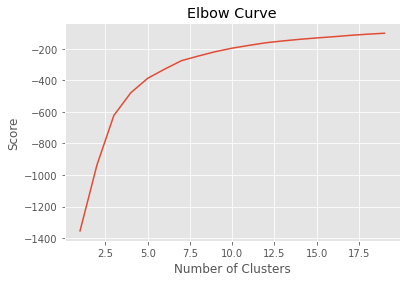

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(reduced).score(reduced) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(reduced)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.0340806  -0.01464435]
 [ 0.19314064  0.06891364]
 [-0.0935422   0.13023781]
 [ 1.01740346  0.14014465]
 [ 0.00848577 -0.20471383]]


Now we plot our clusters

Text(0.5, 1.0, 'K Means Clustering (k=5)')

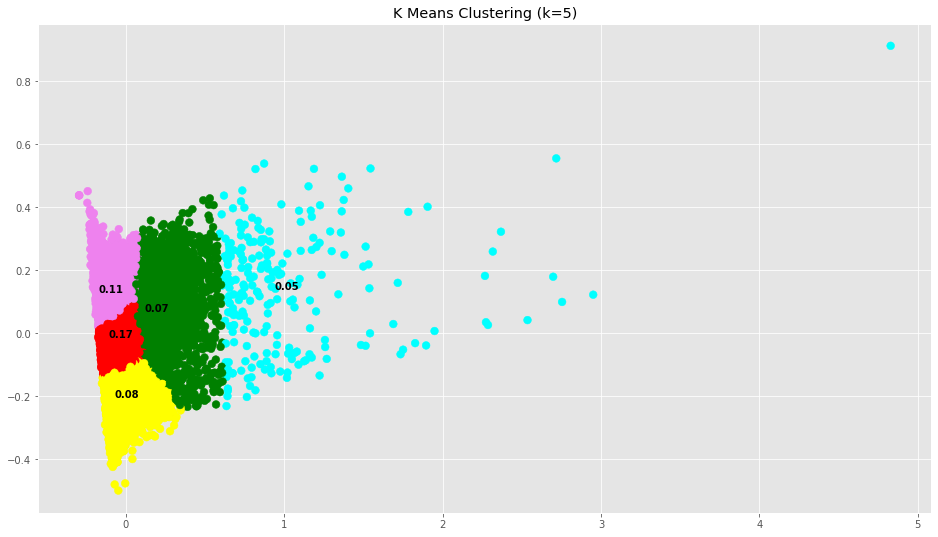

In [ ]:
# Predicting the clusters
labels = kmeans.predict(reduced)

# Calculate density
clustered = df.copy(0)
clustered['LABEL'] = labels

densities = []
for label in np.unique(labels):
    cluster = clustered[(clustered['LABEL'] == label) & (clustered['POBTOT'] > 0)]
    density = np.mean(cluster['PCON_DISC'] / cluster['POBTOT'])
    densities.append(density)

# Assign a color to a cluster
colors=['red','green','violet','cyan','yellow']

assign =[]
for row in labels:
    assign.append(colors[row])
 
fig = plt.figure()
plt.scatter(reduced[0], reduced[1], c=assign, s=60)

# We annotate the cluster density in the cluster centroid
for i in range(len(densities)):
    plt.annotate(str(round(densities[i], 2)), (centroids[i][0], centroids[i][1]), color='black', ha='center', fontweight=1000)

plt.title('K Means Clustering (k=5)')

In [ ]:
from scipy.spatial.distance import cdist

def intra_cluster_dist(clustered):
    distances = []
    for cluster_idx in clustered.LABEL.unique():
        if cluster_idx == -1: continue
        cluster = clustered[clustered['LABEL'] == cluster_idx][[0, 1]]
        dist = cdist(cluster, cluster, 'euclid')
        distances.append(np.mean(dist.mean(axis=0)))
    return distances

def inter_cluster_dist(clustered):
    distances = []
    for idx_a in clustered.LABEL.unique():
        cluster_a = clustered[clustered['LABEL'] == idx_a][[0, 1]]
        for idx_b in clustered.LABEL.unique():
            if idx_a == -1 or idx_b == -1 or idx_a == idx_b:
                continue
            cluster_b = clustered[clustered['LABEL'] == idx_b][[0, 1]]
            dist = cdist(cluster_a, cluster_b, 'euclid')
            distances.append(np.min(dist))
    return distances
            
x = reduced.copy()
x['LABEL'] = labels
distances = intra_cluster_dist(x)
print('Total intra cluster distance: ', np.sum(distances))
#distances

Total intra cluster distance:  1.0701735175679252


In [ ]:
distances = inter_cluster_dist(x)
print('Total inter cluster distance: ', np.sum(distances))
#distances

Total inter cluster distance:  2.973526878061844


## Gaussian Mixture Model Clustering

Gaussian Mixture Models is another popular clustering technique. In contrast to K Means, which can only generate circular clusters due to its nature of defining centroids and point neighborhoods, Gaussian Mixture Models are able to create stretched clusters, which provide more freedom when creating clusters.

Similarly to K Means, Gaussia Mixture clustering requires the user to provide the number of components (clusters) to generate. Since it is impossible to know the optimal number a priori, we follow a similar approach to the elbow curve. However, instead of calculating and plotting the mean squared error, we claculate and plot the Bayesian information criterion (BIC) score.

The BIC score gives us an estimation on how much is good the Gaussian Mixture Model is in terms of predicting the data we actually have. The lower is the BIC, the better is the model to actually predict the data we have, and by extension, the true, unknown, distribution. In order to avoid overfitting, this technique penalizes models with big number of clusters.

We start from 1 target cluster and progressively increment the number of target clusters. For each model, we calculate and plot the BIC score. To select the best model, we choose the point of maximum curvature of the BIC curve.

In this case, we select 5 clusters.


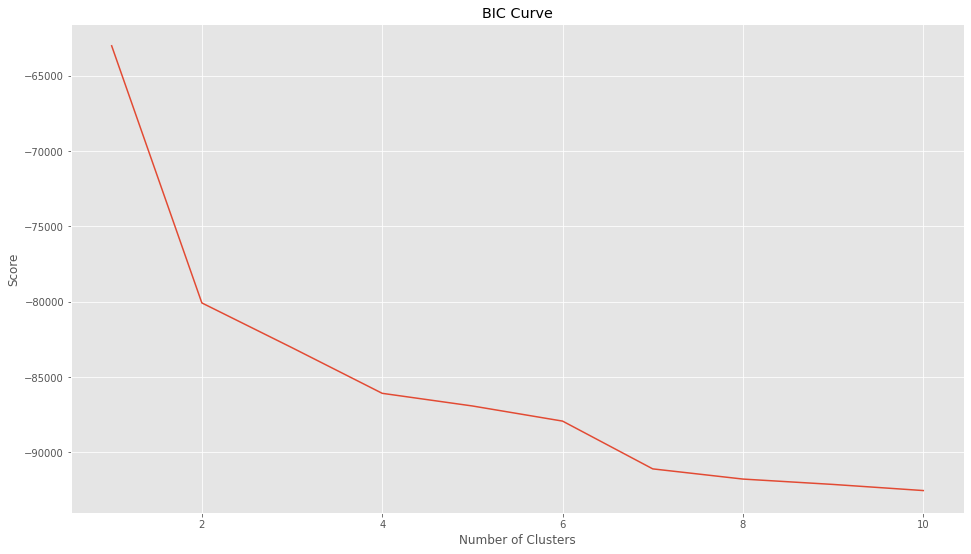

[-63015.39534439747, -80079.3786791209, -83051.76537964001, -86079.15353177425, -86918.86275481136, -87922.98943825746, -91094.00633142993, -91770.0722837464, -92126.41051369654, -92532.92313208651]


In [ ]:
from sklearn.mixture import GaussianMixture

Nc = range(1, 11)
gmm = [GaussianMixture(n_components=i) for i in Nc]

score = [gmm[i].fit(reduced).bic(reduced) for i in range(len(gmm))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('BIC Curve')
plt.show()
print(score)

Text(0.5, 1.0, 'GMM Clustering (n=4)')

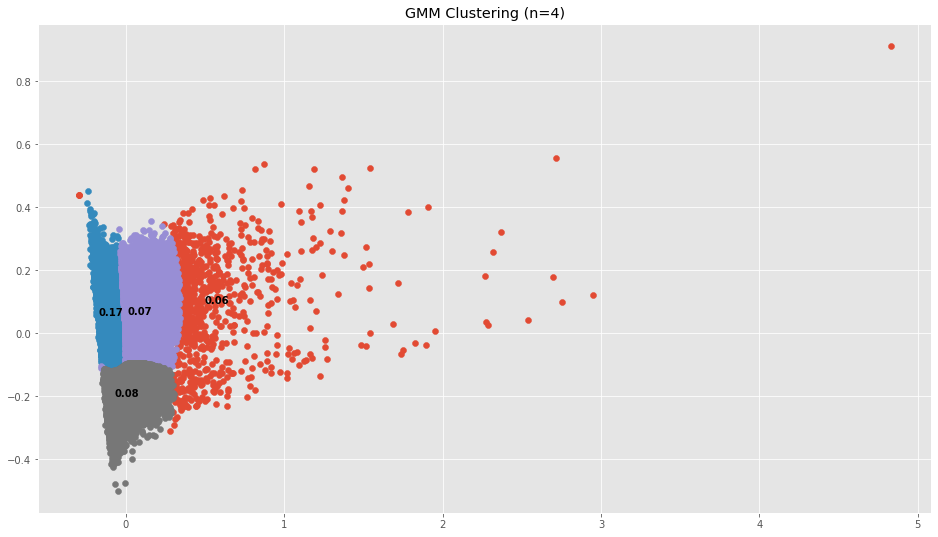

In [ ]:
model = GaussianMixture(n_components=4)
# fit the model
model.fit(reduced)
# assign a cluster to each example
yhat = model.predict(reduced)

# Calculate density
clustered = df.copy()
centers = reduced.copy()
clustered['LABEL'] = yhat
centers['LABEL'] = yhat

densities = []
center = []
for label in np.unique(yhat):
    cluster = clustered[(clustered['LABEL'] == label) & (clustered['POBTOT'] > 0)]
    density = np.mean(cluster['PCON_DISC'] / cluster['POBTOT'])
    densities.append(density)

    cluster = centers[centers['LABEL'] == label]
    x = np.mean(cluster[0])
    y = np.mean(cluster[1])
    center.append((x, y))

# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(reduced.iloc[row_ix][0], reduced.iloc[row_ix][1], cmap='viridis')
# show the plot

# We annotate the cluster density in the cluster centroid
for i in range(len(densities)):
    plt.annotate(str(round(densities[i], 2)), center[i], color='black', ha='center', fontweight=1000)

plt.title('GMM Clustering (n=4)')

In [ ]:
x = reduced.copy()
x['LABEL'] = yhat
distances = intra_cluster_dist(x)
print('Total intra cluster distance: ', np.sum(distances))
print(np.sum(distances))
#distances

Total intra cluster distance:  0.8290737353923373
0.8290737353923373


In [ ]:
distances = inter_cluster_dist(x)
print('Total inter cluster distance: ', np.sum(distances))
#distances

Total inter cluster distance:  0.1370332916670486


## DBSCAN

DBSCAN clusters data points by measuring the distance from each data point to another while considering a minimum number of points. If enough data points are close enough together, DBSCAN will classify it as a new cluster. In contrast to K Means, which fails to accurately cluster data points that are not linearly separable, DBSCAN is able to find intricate clusters based on the density of points.

One of the main parameters of DBSCAN is called Epsilon, which indicates the maximum distance a point can be from another point to be considered a neighbor. To estimate the optimal value of Epsilon, we carried out a k nearest neighbors search. For each data point, we calculated its nearest neighbor and measured their distance. The computed distances were then sorted and plotted. Similarly to the previous approaches, the value for epsilon was selected corresponding to the point of maximum curvature.

For the case of Min Points, as a rule of thumb, $MinPts = 2 \times dim$ can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.

Text(0.5, 1.0, 'Nearest Neighbor distance')

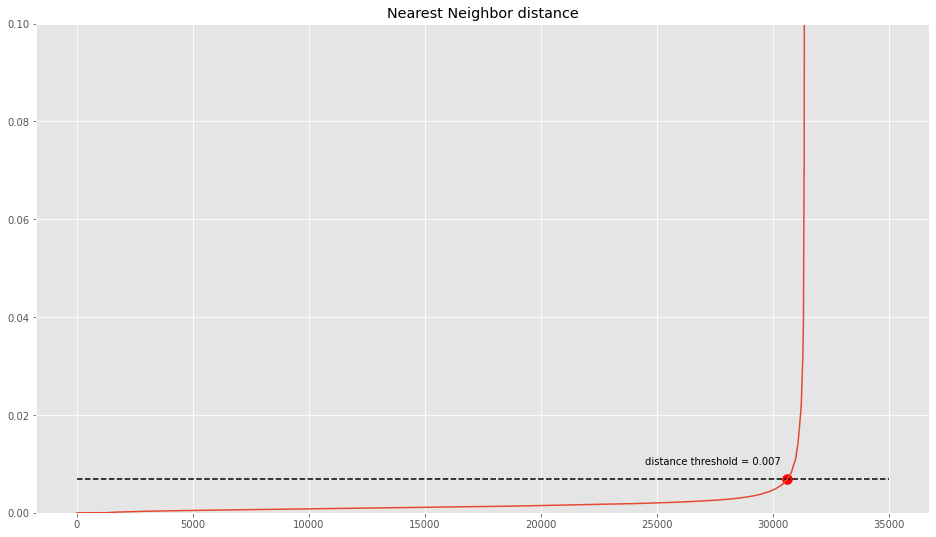

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(reduced)
distances, indices = nbrs.kneighbors(reduced)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.hlines(y=0.007, xmin=0, xmax=35000, linestyles='dashed')
plt.scatter( x = [ 30600 ], y = [ 0.007 ], color = 'red', s = 100  )
plt.text( 24500, 0.01, 'distance threshold = 0.007' )
#plt.xlim([30000, 35000])
plt.ylim([0, 0.1])

plt.title('Nearest Neighbor distance')

Text(0.5, 1.0, 'DBSCAN Clustering')

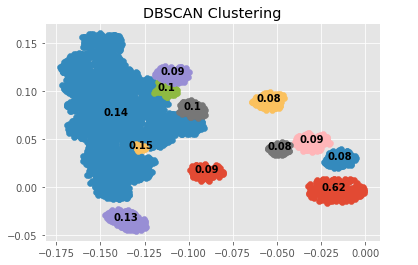

In [8]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.007, min_samples=60) #45, 55, 60
# fit the model
yhat = model.fit_predict(reduced)

# Calculate density
clustered = df.copy()
centers = reduced.copy()
clustered['LABEL'] = yhat
centers['LABEL'] = yhat

densities = []
center = []
for label in np.unique(yhat):
    cluster = clustered[(clustered['LABEL'] == label) & (clustered['POBTOT'] > 0)]
    density = np.mean(cluster['PCON_DISC'] / cluster['POBTOT'])
    densities.append(density)

    cluster = centers[centers['LABEL'] == label]
    x = np.mean(cluster[0])
    y = np.mean(cluster[1])
    center.append((x, y))

# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    if cluster == -1:
        continue
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(reduced.iloc[row_ix][0], reduced.iloc[row_ix][1])


# We annotate the cluster density in the cluster centroid
for i in range(len(densities)):
    plt.annotate(str(round(densities[i], 2)), center[i], color='black', ha='center', fontweight=1000)

plt.title('DBSCAN Clustering')

In [9]:
clusters

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [42]:
x = clustered[clustered['LABEL'] == 0]
x = x[['NOM_MUN', 'NOM_LOC', 'MZA', 'POBTOT', 'PCON_DISC']]
x = x[df.PCON_DISC != 4.740691423780638]
x['DISC_DENS'] = x['PCON_DISC'] / x['POBTOT']
x.sort_values(by='DISC_DENS', ascending=False, inplace=True)
x.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,NOM_MUN,NOM_LOC,MZA,POBTOT,PCON_DISC,DISC_DENS
8756,Mérida,Mérida,28,50.0,13.0,0.260000
9434,Mérida,Mérida,9,50.0,10.0,0.200000
2902,Dzidzantún,Dzidzantún,10,47.0,9.0,0.191489
2995,Dzidzantún,Dzidzantún,18,58.0,11.0,0.189655
15527,Mérida,Mérida,17,60.0,11.0,0.183333
9586,Mérida,Mérida,16,56.0,10.0,0.178571
2894,Dzidzantún,Dzidzantún,2,61.0,10.0,0.163934
5410,Kanasín,Kanasín,9,62.0,10.0,0.161290
19098,Mérida,Mérida,28,57.0,9.0,0.157895
9114,Mérida,Mérida,38,57.0,9.0,0.157895


In [ ]:
x = reduced.copy()
x['LABEL'] = yhat
distances = intra_cluster_dist(x)
print('Total intra cluster distance: ', np.sum(distances))
#distances

Total intra cluster distance:  0.13337129806795028


In [ ]:
distances = inter_cluster_dist(x)
print('Total inter cluster distance: ', np.sum(distances))
#distances

Total inter cluster distance:  7.915159479738801
